# 회귀 지도학습 둘러보기

## 농어 무게 예측하기
K-최근접이웃 회귀모델을 통해 길이값으로 무게를 예측한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 준비
# 길이가 입력이고, 무게가 라벨인 회귀모델
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
perch_length.shape, perch_weight.shape

((56,), (56,))

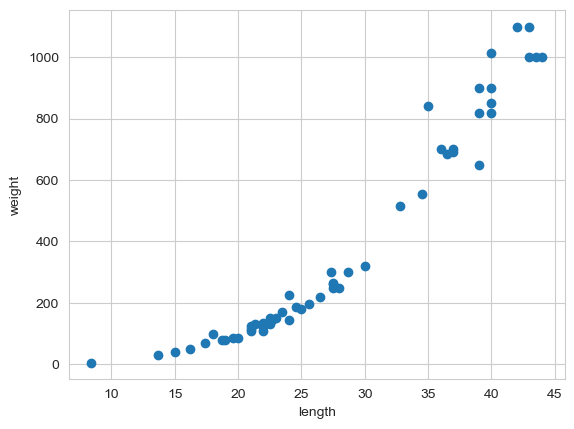

In [4]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42,), (14,), (42,), (14,))

In [132]:
# 배치차원 추가하기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
# 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

KNeighborsRegressor()

### 평가 - 결정계수 $R^2$

$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$

0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다.
- 예측값이 실제값에 가깝다면, 분자가 0에 가까워지고 1에 가까운 값이 반환된다.
- 예측값이 실제값과 차이가 많이 난다면, 분자값이 커지고, 0에 가까운 값이 반환된다.

In [8]:
# 평가
knr.score(test_input, test_label)

0.992809406101064

In [9]:
# 예측
pred = knr.predict([[30]])
pred

array([311.4])

In [10]:
 distances, indexes = knr.kneighbors([[30]])
 distances, indexes

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [11]:
# 최근접 이웃 5개의 무게값의 평균치
train_label[indexes]
train_label[indexes].mean()

np.float64(311.4)

## 최근접이웃모델의 한계
- 메모리에 로드된 데이터포인트만을 대상으로 예측하므로 한계점에서 취약하다.
- 용량이 큰 데이터를 메모리에 로드하는데도 문제가 있다.

In [12]:
# 특정길이의 농어무게 예측
knr.predict([[50], [100]])

array([1010., 1010.])

## 선형회귀 모델
`sklearn.linear_model.LinearRegression`
속성에 따라 회귀계수와 절편을 학습하고, 이를 통해 예측한다.

**컬럼이 하나인 경우**

$y = wx + b$

1. 회귀계수(기울기, 가중치, weight, coefficient)
2. 절편(편향, bias, intercept)


**컬럼이 여러개인 경우**

$y = w_1x_1 + w_2x_2 + w_3x_3 + b$

1. 회귀계수 여러개
2. 절편 1개

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [14]:
# 회귀계수
lr.coef_

array([39.01714496])

In [15]:
# 절편
lr.intercept_

np.float64(-709.0186449535477)

In [16]:
# 예측
lr.predict([[50], [100]])

array([1241.83860323, 3192.69585141])

In [17]:
# 직접 계산
w = lr.coef_ # 기울기
b = lr.intercept_ # 절편
x = np.array([50, 100])
w * x + b

array([1241.83860323, 3192.69585141])

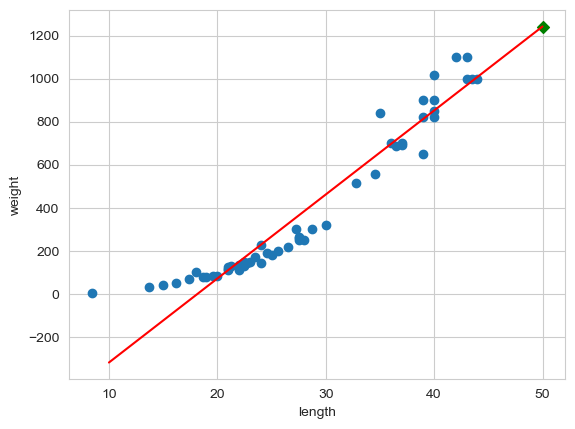

In [18]:
# 시각화
plt.scatter(perch_length, perch_weight)
# 선형방정식 plot
plt.plot([10, 50], [w * 10 + b, w * 50 + b], color='red')

# 예측값
plt.scatter(50, w * 50 + b, color='green', marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 평가 (결정계수)
lr.score(train_input, train_label), lr.score(test_input, test_label)

(0.9398463339976041, 0.8247503123313559)

### 컬럼이 여러개인 데이터의 선형회귀

In [32]:
perch_df = pd.read_csv('data/perch_full.csv')
perch_df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [31]:
perch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [41]:
# 입력데이터 numpy배열로 변환
perch_full = perch_df.to_numpy()
perch_full
perch_full.shape

(56, 3)

In [40]:
# 라벨데이터
perch_weight.shape

(56,)

In [46]:
# 훈련/테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state = 42)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42, 3), (14, 3), (42,), (14,))

In [50]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [53]:
# 예측 : 훈련과 동일한 형식으로 데이터를 전달
lr.predict([[20.0, 5.08, 2.77]]) # 2차원 유지


array([40.48469883])

In [54]:
# 가중치, 절편
lr.coef_, lr.intercept_

(array([ 9.07538153, 69.46401443, 38.00385678]),
 np.float64(-599.1708082981097))

In [68]:
# 직접 계산 y = w1x1 + w2x2 + w3x3 + b
w1,w2,w3 = lr.coef_ # 기울기
b = lr.intercept_ # 절편
x1 = 20.0
x2 = 5.08
x3 = 2.77


w1*x1 + w2*x2 + w3*x3 + b

np.float64(40.484698833552216)

In [69]:
# 평가 (점수가 올랐는지 확인)
lr.score(train_input, train_label), lr.score(test_input, test_label)

(0.9559326821885706, 0.8796419177546367)

## 특성공학 Feature Engineering
기계학습 성능향상을 위해서 기존데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리

- 특성 생성
- 특성 변환
- 결측치 처리
- 차원 축소
- 범주형 데이터 처리 (인코딩)


In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # bias : 절편
poly.fit([[4,5]]) # 속성이 2개인 2차원 데이터
poly.transform([[4,5]]) # 속성을 늘리기 (bias가 살아 있으면 그것도 표에 포함되서 헷갈림)


array([[ 4.,  5., 16., 20., 25.]])

In [75]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [79]:
# 차수 지정 (기본 차수 2)
poly =  PolynomialFeatures(include_bias=False, degree=3)
poly.fit([[4,5]])
poly.transform([[4,5]])

array([[  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [104]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6',
       'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6',
       'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7',
       'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2',
       'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2',
       'x7 x8', 'x8^2'], dtype=object)

In [92]:
# 농어 데이터 특성 추가
poly.fit(perch_full)
poly.transform(perch_full)
poly = PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
poly_perch


array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

In [93]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [108]:
# 훈련/테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state = 42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape


((42, 9), (14, 9), (42,), (14,))

In [109]:
# 훈련
lr = LinearRegression() # 방법 제공
lr.fit(train_input, train_label)

LinearRegression()

In [114]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)

(0.9714559911594095, 0.9903183436982126)

In [127]:
# 특성을 5차까지 늘리고 -> 학습하고 -> 평가

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[4,5]])
poly.transform([[4,5]])
poly.get_feature_names_out()


array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [129]:
poly.fit(perch_full)
poly.transform(perch_full)
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(perch_full) # poly.fit_transform(perch_full)을 하면 아랫줄까지 한번에 할 수 있다.
poly_perch = poly.transform(perch_full)
poly_perch
# poly.get_feature_names_out()

array([[8.40000000e+00, 2.11000000e+00, 1.41000000e+00, ...,
        1.24802202e+01, 8.33986280e+00, 5.57308367e+00],
       [1.37000000e+01, 3.53000000e+00, 2.00000000e+00, ...,
        9.96872000e+01, 5.64800000e+01, 3.20000000e+01],
       [1.50000000e+01, 3.82000000e+00, 2.43000000e+00, ...,
        2.09384991e+02, 1.33195164e+02, 8.47288609e+01],
       ...,
       [4.30000000e+01, 1.25100000e+01, 7.42000000e+00, ...,
        6.39331842e+04, 3.79204018e+04, 2.24915573e+04],
       [4.35000000e+01, 1.26000000e+01, 8.14000000e+00, ...,
        8.56277051e+04, 5.53182159e+04, 3.57373236e+04],
       [4.40000000e+01, 1.24900000e+01, 7.60000000e+00, ...,
        6.84802999e+04, 4.16693578e+04, 2.53552538e+04]])

In [123]:
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state = 42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42, 55), (14, 55), (42,), (14,))

In [125]:
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [130]:
lr.coef_, lr.intercept_

(array([-2.09041655e+04, -1.28309418e+03, -5.60612710e+03,  2.08201562e+03,
         1.22336236e+03, -1.43811122e+03, -4.56998756e+03, -5.32818058e+02,
         6.00806721e+03, -2.10601519e+01, -6.87140843e+01, -1.38721436e+03,
        -1.07552759e+03,  3.95348072e+03,  5.36656174e+03,  3.82381780e+03,
        -5.41554974e+03, -7.44641577e+03, -3.57645487e+03, -8.28192713e+00,
         3.60942426e+02, -4.02968830e+02, -3.16258089e+03,  3.78213590e+03,
         1.35364381e+03,  9.49674897e+03, -9.03102299e+03, -7.05273441e+03,
        -5.77060594e+03, -9.30093568e+03,  5.09437023e+03,  9.77732702e+03,
         9.37642805e+03,  7.91934833e+03, -2.16991211e+00,  3.18805868e+01,
         1.05729767e+01,  1.25147311e+02, -1.16342225e+03,  8.34283450e+02,
        -1.83475841e+03,  7.09692736e+03, -1.74941349e+03, -3.82042961e+03,
         5.50881939e+03, -1.57850368e+04, -1.46774083e+03,  8.08791453e+03,
         8.01748399e+03, -5.22502184e+03,  1.18579503e+04,  6.17639616e+03,
        -7.0

In [131]:
lr.score(train_input, train_label), lr.score(test_input, test_label)

(0.9999999999976599, -144.4072001577299)

## 과대적합/ 과소적합

**과대적합 overfitting**
- 모델이 훈련데이터에 너무 최적화되어서 새로운 데이터에 일반화되지 않은 상태
- 훈련데이터에 대한 평가는 좋지만, 테스트데이터에 대해 평가가 떨어지는 상태
- 훈련데이터의 잡음까지 학습되었음
- 해결방법 :
     - 데이터셋의 복잡도를 줄여야 하낟.
     - 학습할 데이터를 더 많이 제공한다.
     - 딥러닝에서는 Dropout 처리한다. (학습한 일부를 버림)
     - L1, L2가 적용된 규제모델을 사용한다.

**과소적합 underfitting**
- 모델이 훈련이 덜 된 상태, 속성을 제대로 분석하지 못한 상태
- 훈련데이터에 대한 평가조차 좋지 않은 경우
     - 학습할 데이터를 더 많이 제공한다.
     - 특성을 추가해서 복잡한 패턴을 학습하도록 함.